In [1]:
# Import modules and set some defaults
%matplotlib inline
import grale.lenses as lenses
import grale.cosmology as cosmology
import grale.plotutil as plotutil
import grale.feedback as feedback
import grale.images as images
from grale.constants import *
import numpy as np
import matplotlib.pyplot as plt

V = lambda x,y: np.array([x,y], dtype=np.double)
Dd = 800*DIST_MPC
LI = plotutil.LensInfo
DI = plotutil.DensInfo

feedback.setDefaultFeedback("none")
plotutil.setDefaultAngularUnit(ANGLE_ARCSEC)

In [2]:
# This is a helper routine to create a 3D plot of the density of a lens, as well as
# critical lines and caustics for Dds/Ds = 0.8
def createPlots(lens, size):
    lensInfo = LI(lens, size=size, Ds=1, Dds=0.8)
    
    plotutil.plotDensityInteractive(lensInfo)
    plt.figure(figsize=(8,8))
    plotutil.plotImagePlane(lensInfo)
    return lensInfo

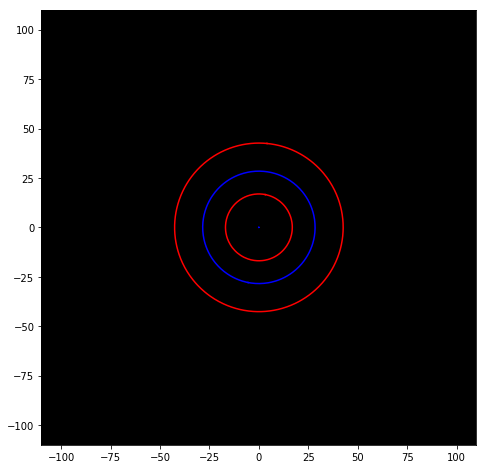

In [3]:
# First we're going to load an actual lens model and visualize it in some plots. In
# a next step, we'll obtain the profile of the lens
realLens = lenses.PlummerLens(Dd, {"mass": 3e14*MASS_SUN, "width": 25*ANGLE_ARCSEC})
size = 220*ANGLE_ARCSEC

lensInfoReal = createPlots(realLens, size)

In [4]:
# We'll get the profile of this symmetric lens, as 512 values between 0 and 100 arcsec
# Because it's a symmetric lens we could also use the getRadialDensityProfile method,
# as is shown later 
endRadius = 100.0*ANGLE_ARCSEC
profile = [ ]
N = 512
for i in range(N):
    theta = V(0, float(i)/(N-1)*endRadius)
    dens = realLens.getSurfaceMassDensity(theta)
    profile.append(dens)

In [5]:
# Based on this discrete profile we'll create a new lens. In between the values, linear
# interpolation is used.
profileLens = lenses.ProfileLens(Dd, {
    'radius': endRadius,
    'profile': profile
})

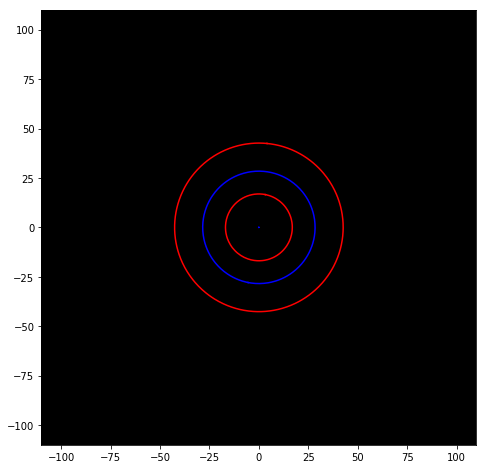

In [6]:
# Let's create some plots for this lens as well. They should look nearly identical
# to the plots above
lensInfoProf = createPlots(profileLens, size)

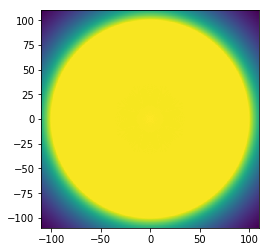

In [7]:
# To show that they're not really identical, let's plot the difference between
# the densities that were calculated
densDiff = lensInfoReal.getDensityPoints() - lensInfoProf.getDensityPoints()
densDiffInfo = DI(densDiff, **lensInfoProf.getArea())
plotutil.plotDensity(densDiffInfo);

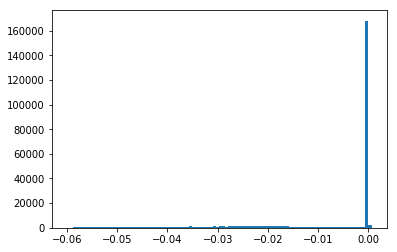

In [8]:
# And if we show a histogram of the differences, it's clear that the difference will
# be very low, but not exactly zero
plt.hist(densDiff.reshape(densDiff.shape[0]*densDiff.shape[1]), bins=100);

In [9]:
# As mentioned above, for this lens we could also use the getRadialDensityProfile
# method
radii = np.linspace(0,endRadius,N)
realLens.getRadialDensityProfile(radii)
profileLens2 = lenses.ProfileLens(Dd, {
    'radius': endRadius,
    'profile': profile
})

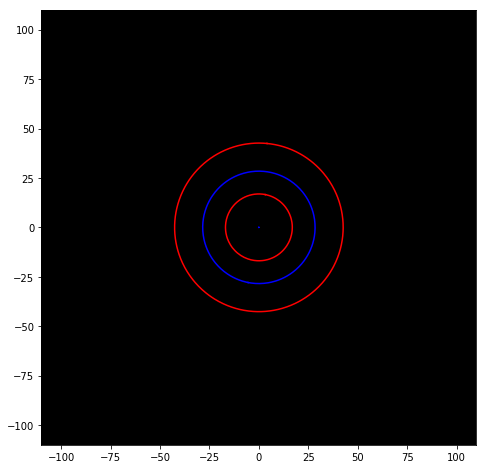

In [10]:
# Let's show the same plots again
lensInfoProf2 = createPlots(profileLens2, size)

In [11]:
# There's absolutely no difference between this way of creating the ProfileLens
# and the previous one, as inspecting the minimum and maximum of the difference
# shows
densDiff2 = lensInfoProf.getDensityPoints() - lensInfoProf2.getDensityPoints()
print(densDiff2.min(),densDiff2.max())

0.0 0.0


In [12]:
# This is to be expected, as they're based on the same parameters that are stored
# internally
profileLens.getLensParameters() == profileLens2.getLensParameters()

True